# Session 2: The Pulse of the Building (EDA)
**Objective**: Explore real-world smart building data, uncover trends, and identify energy consumption patterns.

## Task 2: Load and Examine Data
Loading the dataset and understanding its structure.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [19]:
# Load the dataset
df = pd.read_csv('../data/smart_building_energy.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Display first few rows
df.head()


,Timestamp,Energy_Consumption_kWh,Temperature_C,Humidity_Percent,Occupancy_Count,HVAC_Status,Lighting_Status
0,2025-01-01 00:00:00,135.13,18.2,58.3,40,0,1
1,2025-01-01 01:00:00,132.38,19.4,41.2,70,0,1
2,2025-01-01 02:00:00,132.01,21.2,68.8,77,0,1
3,2025-01-01 03:00:00,131.99,22.2,47.4,42,0,1
4,2025-01-01 04:00:00,66.04,21.6,62.7,17,0,0


In [20]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               720 non-null    datetime64[ns]
 1   Energy_Consumption_kWh  720 non-null    float64       
 2   Temperature_C           720 non-null    float64       
 3   Humidity_Percent        720 non-null    float64       
 4   Occupancy_Count         720 non-null    int64         
 5   HVAC_Status             720 non-null    int64         
 6   Lighting_Status         720 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 39.5 KB


In [21]:
# Statistical summary
df.describe()


,Timestamp,Energy_Consumption_kWh,Temperature_C,Humidity_Percent,Occupancy_Count,HVAC_Status,Lighting_Status
count,720,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2025-01-15 23:30:00,217.952542,24.973472,54.988750,365.827778,0.366667,0.945833
min,2025-01-01 00:00:00,52.040000,17.900000,40.000000,0.000000,0.000000,0.000000
25%,2025-01-08 11:45:00,130.750000,21.675000,47.775000,43.000000,0.000000,1.000000
50%,2025-01-15 23:30:00,136.570000,24.800000,55.050000,60.000000,0.000000,1.000000
75%,2025-01-23 11:15:00,378.242500,28.400000,61.900000,979.500000,1.000000,1.000000
max,2025-01-30 23:00:00,411.720000,31.900000,69.900000,1510.000000,1.000000,1.000000
std,NaN,120.930826,3.718323,8.558253,520.072233,0.482229,0.226504


## Task 3: Exploratory Data Analysis
Visualizing energy consumption trends and correlations.


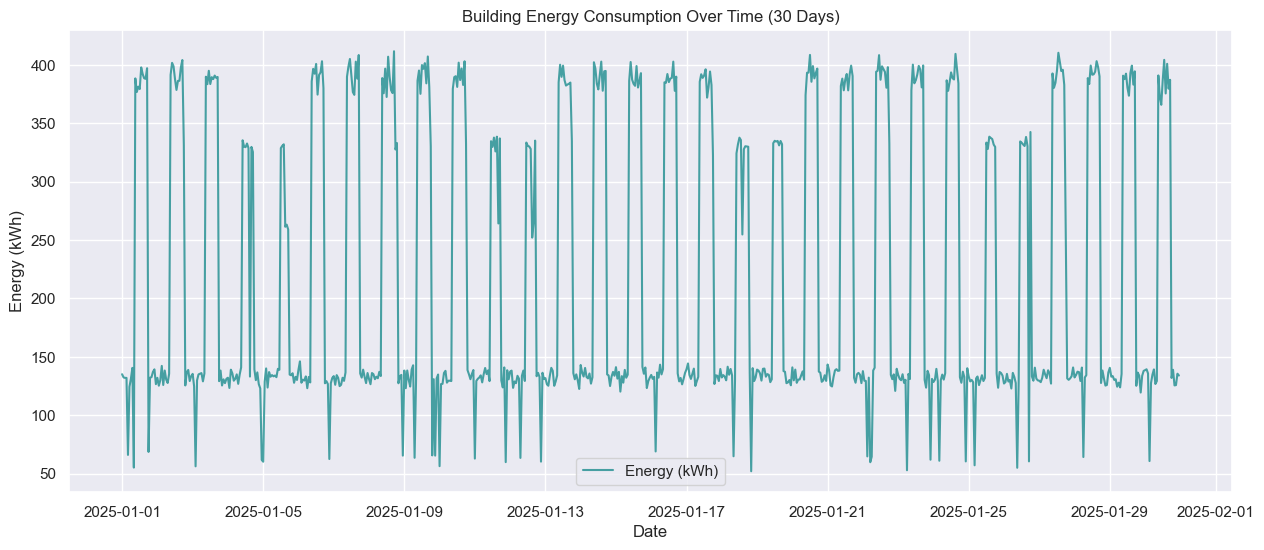

In [22]:
# 1. Energy Consumption Over Time
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Energy_Consumption_kWh'], label='Energy (kWh)', color='teal', alpha=0.7)
plt.title('Building Energy Consumption Over Time (30 Days)')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.show()


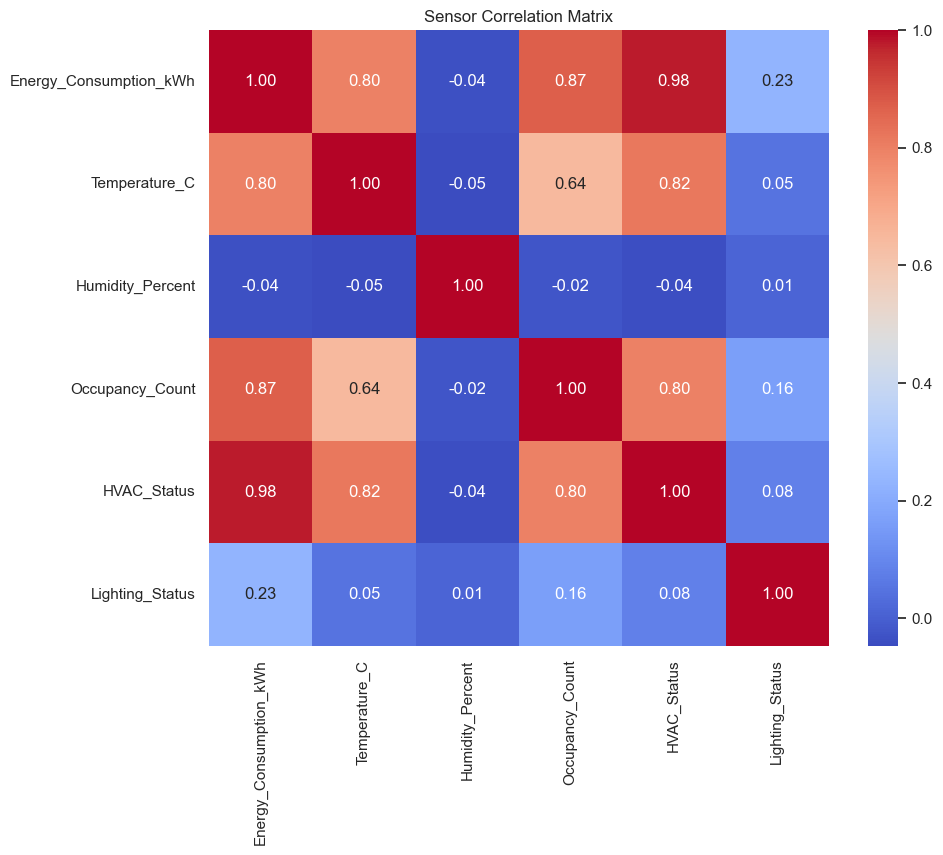

In [23]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sensor Correlation Matrix')
plt.show()


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_3284\3794284164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Energy_Consumption_kWh', data=df, palette='viridis')


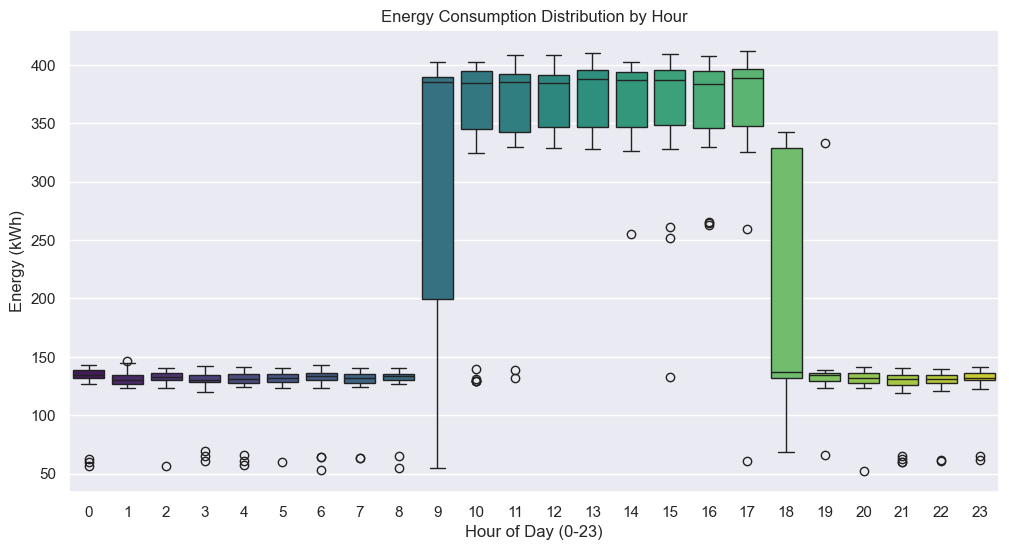

In [24]:
# 3. Energy Distribution by Hour of Day
df['Hour'] = df['Timestamp'].dt.hour

plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Energy_Consumption_kWh', data=df, palette='viridis')
plt.title('Energy Consumption Distribution by Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Energy (kWh)')
plt.show()


## Task 4: Hypothesis Testing
**Hypothesis**: "Energy consumption peaks between 9 AM - 6 PM due to occupancy and HVAC usage."


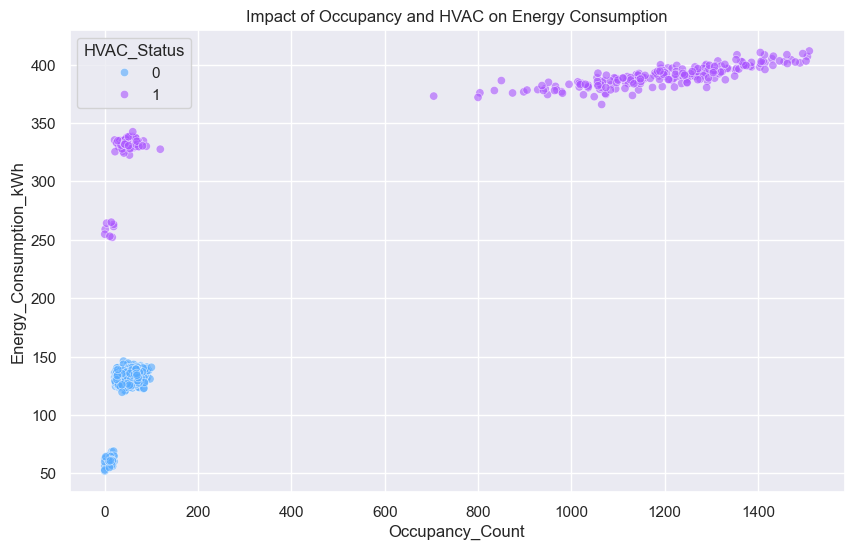

In [25]:
# Analyze relationship between Occupancy and Energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Occupancy_Count', y='Energy_Consumption_kWh', hue='HVAC_Status', data=df, palette='cool', alpha=0.6)
plt.title('Impact of Occupancy and HVAC on Energy Consumption')
plt.show()


## Task 5: Summary & Recommendations
**Findings**:
1. **Peak Hours**: Energy use spikes significantly between 9 AM and 5 PM, correlating with high occupancy.
2. **HVAC Impact**: There is a strong positive correlation between HVAC status and Energy consumption.
3. **Weekends**: Usage drops drastically on weekends.

**Recommendations**:
- **Schedule Optimization**: Pre-cool the building at 8 AM instead of 7 AM to save 1 hour of HVAC runtime.
- **Lighting**: Dim lights automatically when occupancy < 20 (e.g., lunch hours or late evenings).
- **Weekend Mode**: Ensure non-critical systems are fully powered down on Saturdays and Sundays.
